## 线性回归

线性回归，是机器学习领域最为简单的一种机器学习模型，它试图学习一个通过属性的线性组合来进行预测的函数，对于线性组合来说，有两种求解方式：
1. 最小二乘法
2. 梯度下降法

In [1]:
# 导入所需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


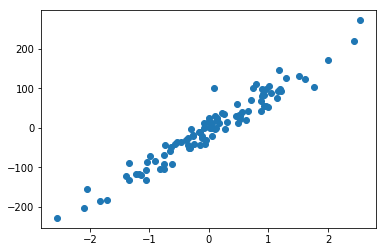

In [2]:
# 构造数据集
X, y = make_regression(n_samples=100, noise=20, n_features=1)
plt.scatter(X,y)

## 使用最小二乘法来求解
#### 最小二乘法是一种求解释一种基于均方误差来求解的一种方法，在线性回归中，最小二乘法就是试图找到一条直线，使所有的样本到直线上的欧式距离最小

$Ax = b$

$A^TAx = A^Tb$

则

$x = (A^TA)^{-1}A^Tb$


In [3]:
ones = np.ones(X.shape[0])
A = np.insert(X, 0, 1, axis=1)

In [4]:
b = y.reshape(-1,1)

In [5]:
# 使用最小二乘法进行求解
x = np.linalg.inv(A.T @ A) @ A.T @ b

In [6]:
x

array([[ -3.15861546],
       [ 90.18195377]])

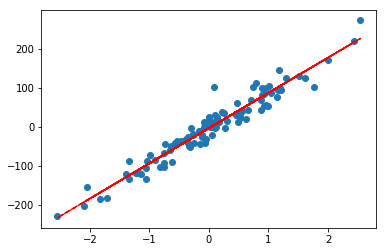

In [7]:
plt.scatter(X,y)

y_pred = A @ x

plt.plot(X,y_pred,'r--')

## 使用梯度下降法来求解

In [10]:
class LinearRegression(object):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1) # 特征
        y = y.reshape(-1,1) # Label
        self.w = np.random.rand(X.shape[1],1) # 对权重进行初始化
    
        for _ in range(50): # 使用50次迭代来进行计算
            y_pred = X @ self.w
            mse = np.mean(0.5*(y_pred-y)**2) # 计算均方根误差
            grad_w = X.T @ (y_pred - y) # 计算梯度方向
            self.w -= 0.01 * grad_w  # 这里的 0.01 代表学习率，使用负梯度方向
            print(_,mse,self.w[0][0],self.w[1][0])
        
    def predict(self,X):
        X = np.insert(X, 0, 1, axis=1)
        return X @ self.w

In [11]:
lr = LinearRegression() # 产生一个实例
lr.fit(X,y)

0 3909.93517224 1.63648283899 81.4569363041
1 289.179665957 -2.69433027399 89.0992072309
2 246.068455666 -3.10099916341 90.0545471494
3 245.465470582 -3.15183575732 90.1668030699
4 245.456976402 -3.1578092423 90.1801559303
5 245.456856711 -3.15851978932 90.1817403421
6 245.456855024 -3.15860410078 90.181928437
7 245.456855 -3.15861410989 90.1819507646
8 245.456855 -3.15861529801 90.1819534151
9 245.456855 -3.15861543905 90.1819537297
10 245.456855 -3.15861545579 90.181953767
11 245.456855 -3.15861545778 90.1819537715
12 245.456855 -3.15861545802 90.181953772
13 245.456855 -3.15861545805 90.181953772
14 245.456855 -3.15861545805 90.1819537721
15 245.456855 -3.15861545805 90.1819537721
16 245.456855 -3.15861545805 90.1819537721
17 245.456855 -3.15861545805 90.1819537721
18 245.456855 -3.15861545805 90.1819537721
19 245.456855 -3.15861545805 90.1819537721
20 245.456855 -3.15861545805 90.1819537721
21 245.456855 -3.15861545805 90.1819537721
22 245.456855 -3.15861545805 90.1819537721
23 245

In [12]:
# 再进行预测
y_pred = lr.predict(X)

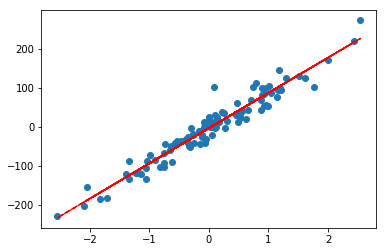

In [13]:
# 画出图像
plt.scatter(X,y)
plt.plot(X,y_pred,'r--')

## 拓展：最优解闭式解

In [14]:
x_mean = np.mean(X)
Y = y.reshape(-1,1)

w = np.sum(Y*(X-x_mean))/(np.sum(X**2)-1./X.shape[0]*(np.sum(X))**2)
b = np.sum(Y-w*X)/X.shape[0]

In [15]:
b,w

(-3.1586154580492014, 90.181953772053575)